### **A labor célja**
A labor célja, hogy a hallgatókat megismertesse a lineáris és logisztikus regresszióval és ezekből kiindulva a neurális hálózatok alapjaival.

<!-- Elméleti háttér, otthoni felkészülési anyag -->

# **Regresszió és osztályzás** #

Mind a regresszió és az osztályozás is felügyelt gépi tanulási problémák. A felügyelt gépi tanulás során rendelkezésünkre állnak minták, azaz (bemenet; elvárt kimenet) párok. A célunk pedig egy olyan modell létrehozása, mely képes a minták alapján a bemenet-kimenet párok közti leképzés megtanulására, amit aztán majd a modell által még nem látott mintákon alkalmazhatunk. Tipikus problémák pl.:
- fiziológiai jellemzők alapján: beteg-e vagy sem az illető (O)
- gazdasági mutatók alapján: következő évi GDP becslése (R)
- kép alapján: milyen objektum látható a képen (O)
- házak jellemzői alapján: azok árának becslése (R)

Az előző példákban meg vannak jelölve az osztályozási (O) és regressziós (R) feladatok, ami alapján talán érezhető a különbség:

- osztályozás során a célváltozónk (amit meg szeretnénk "jósolni", prediktálni szeretnénk) egy kategória címke (beteg/nem beteg; autó/gyalogos/közlekedési tábla/közlekedési lámpa)
- regresszió során pedig egy folytonos érték (GDP értéke, ház értéke).


###[Lineáris regresszió](#scrollTo=IqEtn1cCc5T8&line=62&uniqifier=1)

###[Bináris osztályozás logisztikus regresszióval](#scrollTo=2RvYf74NTlFt&line=2&uniqifier=1)

###[Neurális hálózatok](#scrollTo=AO5Aooi6QlA-&line=1&uniqifier=1)



# **Lineáris regresszió**

Lineáris regresszió során a bemenet ($\mathbf{x}$) és az elvárt kimenet ($y$) között lineáris kapcsolatot feltételezünk:

$y \approx \mathbf{w}^\mathsf{T}\mathbf{x} + b$,

ahol
- $y \in \mathbb {R}$ egy skalár, az elvárt kimenet
- $\mathbf{x} \in \mathbb {R} ^{n}$ a bemeneti vektor, ami az attribútumokhoz tartozó értékeket tartalmazza
- $\mathbf{w} \in \mathbb {R} ^{n}$ az egyes attribútumokhoz tartozó súlyokat tartalmazó vektor (ezt keressük)
- $b \in \mathbb {R}$ a bias, egy skalár, ami fix értékkel eltolja a súlyozott összeget (ezt is keressük)

Ha $\mathbf{x}$-hoz mindig felveszünk $+1$ komponensként egy $1$ értékű elemet  (jelölje ezt a bővített vektort $\phi(\mathbf{x})$), és ennek megfelelően a $\mathbf{w}$ vektorunk is eggyel hosszabb lesz, akkor a kifejezés így egyszerűsödik:

$y \approx \mathbf{w}^\mathsf{T}\phi(\mathbf{x})$,

azaz

$
y \approx
\begin{bmatrix}
  w_0 = b\\
  w_1\\
  \vdots\\
  w_n
\end{bmatrix}
\begin{bmatrix}
  x_0 = 1\\
  x_1\\
  \vdots\\
  x_n
\end{bmatrix}
$

Mint látható, a kifejezésben nem "$=$", hanem "$\approx$" szerepel. Az adatainkat (méréseinket) ugyanis jellemzően zaj terheli. A valóságban gyakran feltételezünk normális eloszlású (Gauss) zajt (ami a legtöbb esetben helyes is), mivel ezzel jellemzően könnyű számolni. Ekkor a kifejezés így módosul:

$ y = \mathbf{w}^\mathsf{T}\phi(\mathbf{x}) + \epsilon $,

ahol $\epsilon \sim {\mathcal {N}}(0 ,\sigma ^{2})$: 0 várhatóértékű, $\sigma$ szórású, normál eloszlású zaj

Ezután, ha a [maximum likelihood becslés](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)<sup>1</sup> módszerével keressük az optimális $\mathbf{w}$ értéket, akkor 2 érdekes eredményre is jutunk:

- négyzetes hibát kell minimalizálnunk:  $(\mathbf{w}^\mathsf{T}\phi(\mathbf{x})-y)^2 $ \
(ezt hívják veszteségfüggvénynek)
- erre a konkrét feladatra létezik [zárt alakú megoldás](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse): $ \mathbf{w} = (\mathbf{Φ}^\mathsf{T} \mathbf{Φ})^\mathsf{-1} \mathbf{Φ}^\mathsf{T} \mathbf{y} $,
ahol $ \mathbf{Φ}^\mathsf{T} =
\begin{bmatrix}
  \vdots & \vdots &  & \vdots\\
  \phi(\mathbf{x}_{1}) & \phi(\mathbf{x}_{2}) & \dots & \phi(\mathbf{x}_{n}) &\\
  \vdots & \vdots & &\vdots \\
\end{bmatrix}
$ a bemeneti vektorok oszloponként mátrixba szervezve, $\mathbf{y} = \begin{bmatrix} y_1 & y_2 & \dots & y_n \end{bmatrix}$ pedig az elvárt kimenetek vektorba rendezve.


-----

Ha még visszatérünk az $y \approx \mathbf{w}^\mathsf{T}\mathbf{x} + b$ egyenletre, akkor megfigyelhetjük, hogy ez egy hipersíkot ír le, amelynek $\mathbf{w}$ a normálvektora és $b$-vel van eltolva. A hipersík a hipertér 1 dimenzióval kevesebb dimenziójú altere - tehát pl. 2D-ben egy egyenes, 3D-ben egy sík -, ami 2 részre osztja a teret. A modellünk szerint tehát a mintáink egy ilyen hipersíkon helyezkednek el, ha eltekintünk a zajtól. A hipersíknak fontos szerepe lesz még az osztályzásnál.

-----

<sup>1</sup> Ez a lépés ugyan nincs részletezve itt, de a mögötte lévő matematika nem túl bonyolult. Egy úgynevezett likelihood függvényt kell felírni és megkeresni a maximumhelyét. A likelihood függvény pedig egy $p(\text{megfigyelések}|\text{paraméterek})$ alakú feltételes valószínűséget leíró függvény, tehát gyakorlatilag keressük azt a paraméterezést ($\mathbf{w}$-t), ami legjobban magyarázza a megfigyeléseinket. A [Gépi tanulás tantárgy jegyzet](https://github.com/bolgarbe/gtjegyzet/blob/main/book.pdf)ének kompakt leírása alapján könnyű megérteni.

Kezdjük egy egyszerű feladattal! Először egy egyenes paramétereit fogjuk megkeresni.

Az alábbi kódrészlet importálja a feladatrészhez szükséges könyvtárakat. A ```%reset -sf``` parancs töröl minden változót, így az egyes feladatrészek változói nem keverednek.

In [3]:
%reset -sf

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

100 minta alapján fogjuk illeszteni a modellt. Ehhez 0 és 10 között egyenletesen veszünk fel pontokat (```x```) és a bias 1-eseit hozzávéve egy Φ (```phi```) mátrixba rakjuk. Érdemes megismerkedni a numpy függvényeivel, mert később hasznosak lesznek.

[```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

[```np.stack```](https://numpy.org/doc/stable/reference/generated/numpy.stack.html)

Az identifikálandó függvény most az $y = 5 + 2x$ lesz (```w_true``` az együtthatókat jelöli).

Numpyban a ```@``` operátorral (is) lehet mátrixszorzást végezni.

Végül a matplotlib segítségével kirajzoljuk a függvényt.

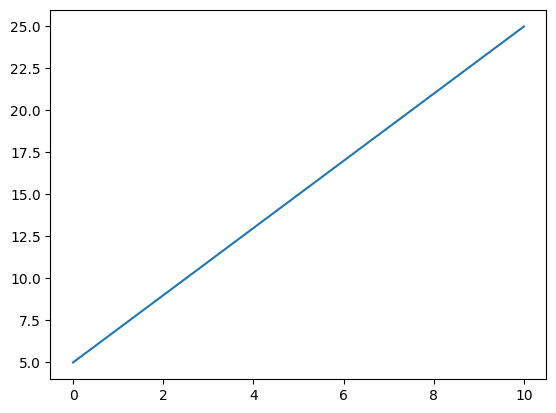

In [4]:
n_samples = 100  # 100 minta alapján dolgozunk
x = np.linspace(0, 10, n_samples)  # x koordináták; shape: (100,)
phi = np.stack([np.ones(n_samples), x], axis=-1)  # Φ mátrix; shape: (100,2)
w_true = np.array([5, 2])  # súlyok; shape: (2,)
y_true =  phi @ w_true  # y koordináták vektor-mátrix szorzással; shape: (100,)

plt.plot(x, y_true);  # kirajzolás

Kiszámítjuk a súlyokat a fent ismertetett képlet alapján:

In [5]:
w_est = np.linalg.inv(phi.T @ phi) @ phi.T @ y_true  # súlyok meghatározása a képlet alapján
w_est

array([5., 2.])

Ugyanezt megvalósíthatjuk a beépített pszeudoinverz függvény segítségével is:

In [6]:
w_est = np.linalg.pinv(phi) @ y_true  # súlyok meghatározása pszeudoinverz segítségével
w_est

array([5., 2.])

Láthatjuk, hogy ebben az egyszerű esetben pontosan meg tudtuk határozni a lineáris összefüggés paramétereit.

Következőnek a lineáris összefüggés paramétereit zajos minták alapján próbáljuk meghatározni. Ennek szimulálásához keverjünk 0 várható értékű és 1 szórású normál eloszlású zajt az adatokhoz!

[```numpy.random.normal```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

 A **```#TODO```-val megjelölt helyeken egészítse ki a kódcellákat a megfelelő részletekkel!**

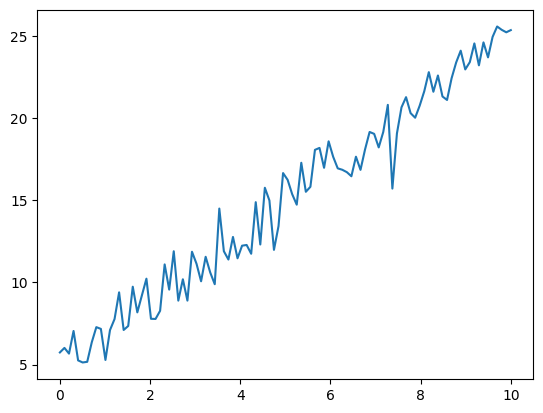

In [ ]:
n_samples = 100
x = np.linspace(0, 10, n_samples)
phi = np.stack([np.ones(n_samples), x], axis=-1)
w_true = np.array([5, 2])
y_true =  phi @ w_true + np.random.normal(scale=1, size=n_samples)  # y koordináták előállítása zaj hozzáadásával
plt.plot(x, y_true);

In [ ]:
w_est = np.linalg.pinv(phi) @ y_true
w_est

array([4.83289468, 2.03102202])

Láthatjuk, hogy a paraméterek megközelítőleg jók. Jellemzően érvényes az a megfigyelés, hogy minél több (konzisztens) mintánk van, annál pontosabb lesz a becslés.

Rajzoljuk ki a becsült paraméterek alapján az egyenest!

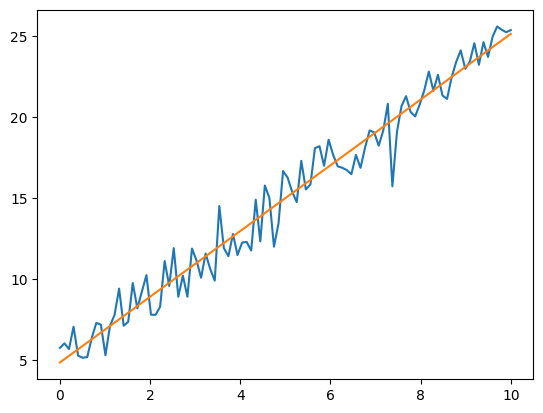

In [ ]:
plt.plot(x, y_true)
plt.plot();  #TODO

Ugyanezt a feladatot még el tudjuk képzelni 3 dimenzióban, ahol a minták egy 2 dimenziós síkon helyezkednek el. Ez azt jelenti, hogy 2 jellemző alapján szeretnénk megbecsülni egy 3-dikat.
Most az adatokhoz 0.1 szórású, 0 várhatóértékű normál eloszlású zajt keverjünk!

In [ ]:
n_samples = 100
n_features = 2
x = np.random.rand(n_samples, n_features)  # 2d bemeneti koordináták
phi = np.hstack([np.ones((n_samples, 1)), x])  # shape: (100,3)
w_true = np.array([5, 2, 3])
y_true =  phi @ w_true + np.random.normal(scale=0.1, size=n_samples)  # zajjal terhelt kimenet

Ha jól sikerült a generálás, akkor az alábbi kód kirajzolja a generált mintákat és a síkot.

In [ ]:
# 3d visualization
fig = px.scatter_3d(x=x.T[0], y=x.T[1], z=y_true)
fig.update_traces(marker={'size': 2})
surface_x = np.linspace(0, 1, 10)
surface_y = np.linspace(0, 1, 10)
surface_z = w_true[0] + np.add.outer(surface_y * w_true[2], surface_x * w_true[1])
fig.add_trace(go.Surface(x=surface_x, y=surface_y, z=surface_z, showscale=False))
fig.show()

Ismét becsüljük meg a paramétereket a pszeudoinverz segítségével!

In [ ]:
w_est =   #TODO
w_est

array([4.99844123, 2.03297199, 2.99989469])

Végül nézzünk meg egy életszerűbb példát: most 10 bemeneti jellemzőnk lesz. A mintáinkat két részre osztjuk: tanító- és teszt partícióra. A tanító halmaz alapján előállított becslésünket a teszt halmaz alapján ellenőrizzük. Regressziónál a becslés jóságát általában root mean squared errorral (RMSE) szoktuk jellemezni.

${\displaystyle \operatorname {RMSE} = \sqrt{ {\frac {1}{n}}\sum _{i=1}^{n}\left(Y_{i}-{\hat {Y_{i}}}\right)^{2}.}}$

In [ ]:
n_samples = 100  # 100 db minta
n_features = 10  # 10 bemeneti jellemző
train_data_rate = 0.8  # 0.8-0.2 arányban osztjuk ketté az adatokat

# tanító adatok létrehozása és partícionálása
x = np.random.rand(n_samples, n_features)
n_train_samples = int(train_data_rate*n_samples)
n_test_samples = n_samples-n_train_samples
x_train = x[:n_train_samples]
x_test = x[-n_test_samples:]

# Φ mátrixok létrehozása
phi_train = np.hstack([])  #TODO
phi_test = np.hstack([])  #TODO

w_true = np.random.rand(1 + n_features)

# zajjal terhelt kimenetek létrehozása
y_train_true =   #TODO
y_test_true =   #TODO

w_true

array([0.54191526, 0.64454849, 0.68004796, 0.9001252 , 0.94530014,
       0.16972485, 0.29674857, 0.37951227, 0.59858368, 0.69542102,
       0.5052814 ])

Végezzük el az optimális paraméterek meghatározását!

In [ ]:
w_est =   #TODO
w_est

array([0.58241452, 0.60741863, 0.65607414, 0.91388487, 0.94740333,
       0.10905145, 0.2999723 , 0.37582762, 0.59320403, 0.72166625,
       0.52950037])

Határozzuk meg az elvárt kimenet (```y_test_true```) és a becsült kimenet (```y_test_est```) közötti eltérést, más néven hibát. Ehhez először meghatározzuk a becsült kimenetet a teszt adathalmazon.

In [ ]:
y_test_est =   #TODO

Grafikonon vizualizálhatjuk az eltérést a becsült és a valós kimenetek között.

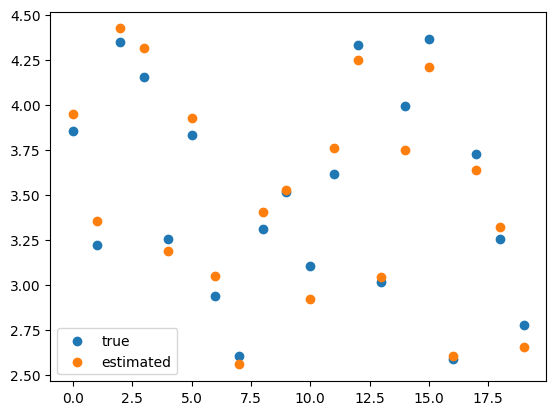

In [ ]:
xs = np.arange(n_test_samples)
plt.scatter(xs, y_test_true.flatten(), label='true')
plt.scatter(xs, y_test_est.flatten(), label='estimated')
plt.legend();

A hiba jellemzésére RMSE számítást végzünk (úgy is fogalmazhatunk, hogy RMSE hibafüggvényt alkalmazunk).

In [ ]:
rmse = np.sqrt()  #TODO
print(f'root mean squared error: {rmse:.2f}')

root mean squared error: 0.12


Az eredmény alapján láthatjuk, hogy viszonylag jó közelítést tudtunk adni az elvárt kimenetre. (Az itt kapott értéknek a hozzáadott **zaj szórásához** kell közel esnie.)

# **Bináris osztályozás logisztikus regresszióval**

Logisztikus regresszió során két osztályunk van, és azt feltételezzük, hogy ezek lineárisan szeparálhatóak, azaz a hipersík egy-egy oldalán helyezkednek el. Itt ismét a valószínűségszámítás eszköztárát felhasználva és bizonyos egyszerűsítésekkel élve a következő kifejezésre jutunk (itt is érdemes elolvasni a [Gépi tanulás tantárgy jegyzet](https://github.com/bolgarbe/gtjegyzet/blob/main/book.pdf)ét):

$\displaystyle \hat{y} = p(y=1|x) = \frac{1}{
  1 + \exp (- ( \mathbf{w}^\mathsf{T}\phi(\mathbf{x}) ))
  } = \sigma(\mathbf{w}^\mathsf{T}\phi(\mathbf{x}))$

$1 - \hat{y} = p(y=0|x) = 1 - \sigma(\mathbf{w}^\mathsf{T}\phi(\mathbf{x}))$,

ahol
- $y$ egy skalár, ami 0-ás (egyik osztályba tartozó minta) vagy 1-es (másik osztályba tartozó minta) értékű
- $\mathbf{x} \in \mathbb {R} ^{n}$ a bemeneti vektor, ami az attribútumokhoz tartozó értékeket tartalmazza
- $\mathbf{w} \in \mathbb {R} ^{n}$ az egyes attribútumokhoz tartozó súlyokat tartalmazó vektor (ezt keressük)
- a $\phi$ függvényt továbbra is a bias "elrejtésére" használjuk
- $\sigma(a) =  \frac{1}{1 + e^{-a}}$ pedig a szigmoid függvény, aminek az értékkészlete (0; 1)

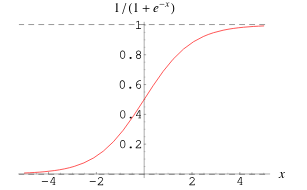

Tehát a kimenet ($\hat{y}$) azt adja meg, hogy mekkora egy minta 0-ás ill. 1-es osztályba való tartozásának valószínűsége.

Az optimális $\mathbf{w}$ értéket ismét maximum likelihood módszerrel keressük, aminek eredményeként most nem kapunk zárt alakban megoldást, viszont itt is kapunk egy veszteségfüggvényt (bináris keresztentrópia), amit minimalizálnunk kell:

$ L(\mathbf{w})\ =\ -\sum _{i} y_i\log {\hat {y_i}}-(1-y_i)\log(1-{\hat {y_i}})$

Ezt különböző módszerekkel minimalizálhatjuk, például a gradiens módszerrel (gradient descent - ```/ˈɡreɪ.di.ənt dɪˈsent/```). Ennek lényege, hogy iteratívan módosítjuk $\mathbf{w}$-t úgy, hogy kis lépéseket teszünk $L$-nek $\mathbf{w}$ szerinti gradiensével ellentétes irányába. Ugyan a veszteségfüggvényünk felülete jellemzően többdimenziós és sokkal bonyolultabb, az alábbi ábra jól szemlélteti az eljárás működését:

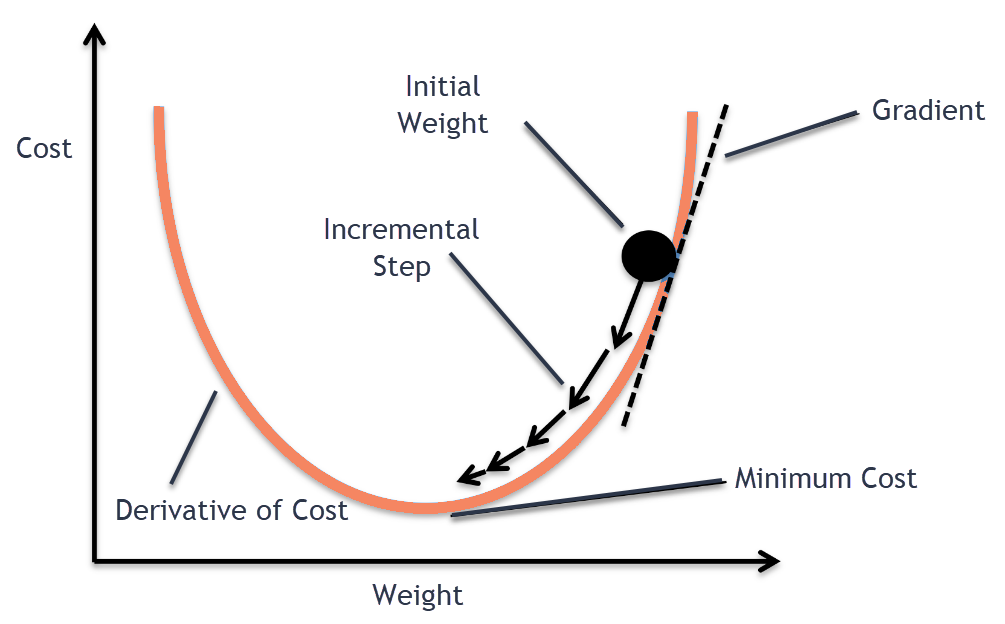



Ha $L$-nek vesszük a $w$ szerinti gradiensét, akkor az alábbi összefüggést kapjuk:
$∇_\mathbf{w} L = -\sum_i(y_i - \hat y_i)ϕ_i$

Ezzel tehát iteratívan tudjuk frissíteni a $w$ súlyvektor értékeit:

$\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_\mathbf{w}L$

Itt $\alpha$ a frissítés mértéke (learning rate - tanulási ráta), azaz, hogy mekkorát lépjünk a gradienssel ellentétes irányba. Ha túl nagyot lépünk, akkor előfordulhat, hogy rendre "átlépjük" a minimumhelyet. Ha túl kicsiket lépünk, akkor viszont sokáig tart a tanítás. Ennek beállítására többféle stratégia létezik különböző optimalizálók (ADAM, RMSProp, Momentum, szimulált lehűtés, stb.) formájában. Ennél az egyszerű feladatnál egy kézzel beállított értéket fogunk használni.


A hatékony futás érdekében a frissítést vektorizáltan végezzük el, ehhez a gradienst írjuk fel mátrixos alakban:


$∇_\mathbf{w} L = -\Phi^\mathsf{T}(\mathbf{y} - \hat{\mathbf{y}})$,
ahol $ \hat{\mathbf{y}} = \sigma(\mathbf{\Phi w})$

Az alábbi cella futtatásával töröljük az előző feladat változóit és importáljuk a szükséges könyvtárakat.

In [ ]:
%reset -sf

import numpy as np
import matplotlib.pyplot as plt

A tanítóminták az ábrán látható módon fognak kinézni.  

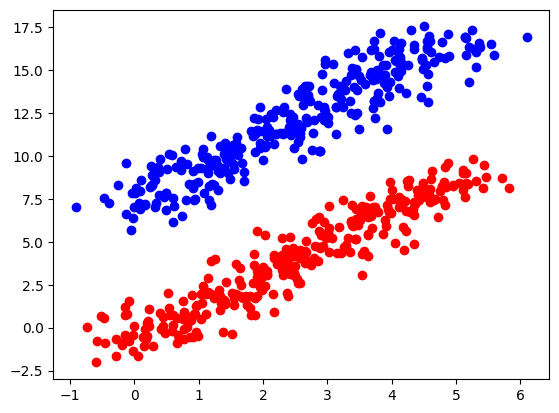

A pontok két klaszterben (0 - kék és 1 - piros) helyezkednek el és lineárisan szeparálhatóak.

A 0 címkéjű osztály pontjai helyezkedjenek az $x_2 = 2 \cdot x_1+7$ egyenletű egyenes mentén, ahol $0 < x_1 <  5$.

A 1 címkéjű osztály pontjai helyezkedjenek az $x_2 = 2 \cdot x_1-1$ egyenletű egyenes mentén, ahol $0 < x_1 <  5$.

Mindkét osztály legyen 300 elemű.
Valamint a mintákhoz keverjünk $0$ várhatóértékű, $0.5$ szórású, normális eloszlású zajt!


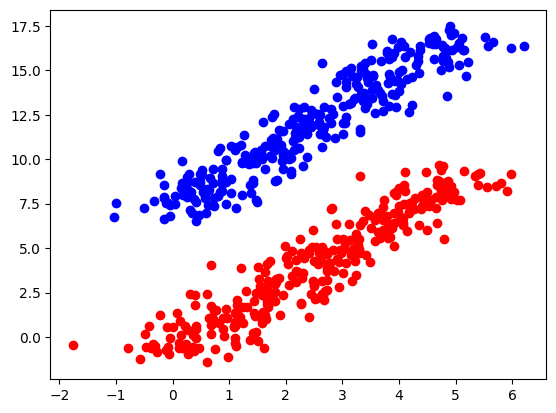

In [ ]:
# --- Bemeneti minták generálása ---
n_samples = 600  # 600 minta alapján dolgozunk
n_samples_0 = n_samples // 2  # ennek a fele 0-ás címkéjű/osztályú
n_samples_1 = n_samples - n_samples_0  # a másik fele 1-es címkéjű

# "0" címkéjű (kék) osztály mintái: 0<x1<5; x2=2⋅x1+7
class_0_x1 = np.linspace()  # 0<x1<5; shape: (300,) #TODO
class_0_x2 =   # shape: (300,) #TODO
class_0 = np.column_stack((class_0_x1, class_0_x2))  # x1 és x2 egymás mellé; shape: (300, 2)

# "1" címkéjű (piros) osztály mintái: 0<x1<5; x2=2⋅x1−1
class_1_x1 = np.linspace()  # 0<x1<5; shape: (300,) #TODO
class_1_x2 =   # shape: (300,) #TODO
class_1 = np.column_stack((class_1_x1, class_1_x2))  # x1 és x2 egymás mellé;  shape: (300, 2)

# bemeneti adatok egymás után fűzése
inputs_without_noise = np.row_stack((class_0, class_1))  # shape: (600, 2)

# zaj hozzáadása
noise = np.random.normal()  # shape: (600, 2) #TODO
inputs = inputs_without_noise + noise  # shape: (600, 2)


# --- Címkék generálása ---
label_0 = np.repeat(0.0, n_samples_0)  # 0-ás címkék létrehozása; shape: (300,)
label_1 = np.repeat()  # 1-es címkék létrehozása; shape: (300,) #TODO

# címkék egymás után fűzése
labels = np.concatenate((label_0, label_1))  # shape: (600,)

# kirajzolás
for i in range(n_samples):
    marker = 'bo' if labels[i] == 0.0 else 'ro'
    plt.plot(inputs[i,0], inputs[i,1], marker)
plt.show()

Az alábbiakban definiálunk 2 segédfüggvényt.

- az egyik maga a szigmoid függvény, aminél numerikus instabilitás miatt érdemes kettéválasztani két esetet: $x \geq 0$ és $x < 0$
- a másik függvény a tanulás folyamatában fogja kirajzolni az állapotot

In [ ]:
def sigmoid(x):
    positive = x >= 0
    negative = ~positive

    result = np.empty_like(x)
    result[positive] = 1 / (1 + np.exp(-(x[positive])))
    exp = np.exp(x[negative])
    result[negative] = exp / (exp + 1)

    return result

def plot_regression_state(inputs, w_est):
  n_samples = inputs.shape[0]
  grid_x1 = np.linspace(inputs[:, 0].min(), inputs[:, 0].max(), 100)
  grid_x2 = np.linspace(inputs[:, 1].min(), inputs[:, 1].max(), 100)
  x1s, x2s = np.meshgrid(grid_x1, grid_x2)
  zs = sigmoid(w_est[0] + w_est[1] * x1s + w_est[2] * x2s)
  plt.contourf(x1s, x2s, zs, 21, cmap='jet',  vmin=0, vmax=1)
  for i in range(n_samples):
      marker = 'bo' if labels[i] == 0.0 else 'ro'
      plt.plot(inputs[i,0], inputs[i,1], marker)
  plt.colorbar();
  plt.show()

Állítsuk elő ismét a Φ mátrixot!

In [ ]:
phi = np.hstack([np.ones((n_samples, 1)), inputs])

A súlyok frissítése tehát a következőképpen történik:

$\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_\mathbf{w}L = \mathbf{w} - \alpha (-\Phi^\mathsf{T}(\mathbf{y} - \sigma(\mathbf{\Phi w}))$


Annak érdekében, hogy ne lépjünk túl nagyokat, a gradienst még osszuk el a minták számával. A változók jelöljék az alábbi tagokat:

- ```y_hat```: $\sigma(\mathbf{\Phi w})$

- ```diff```: $\mathbf{y} -$ ```y_hat```
- ```grad```: $\nabla_\mathbf{w}L$

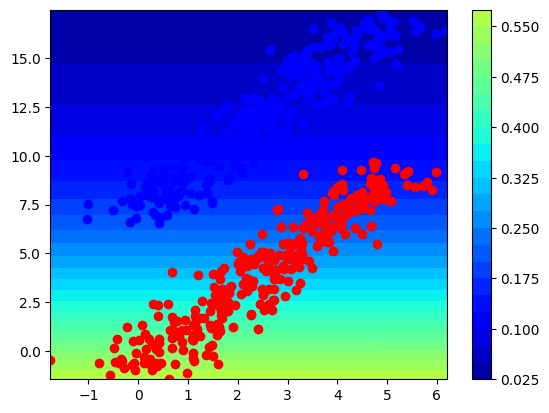

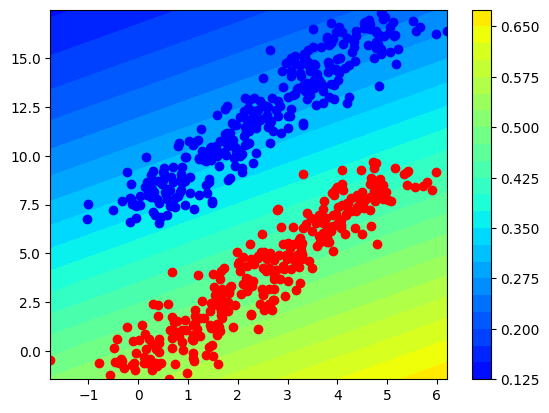

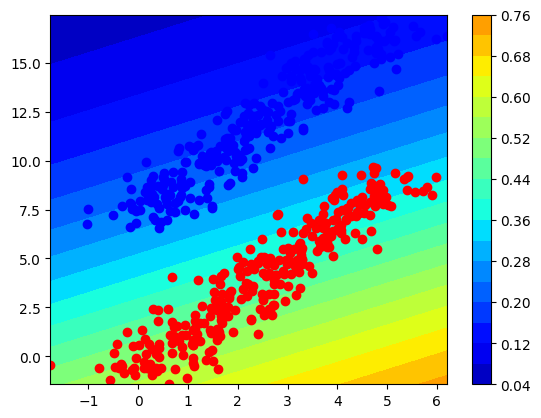

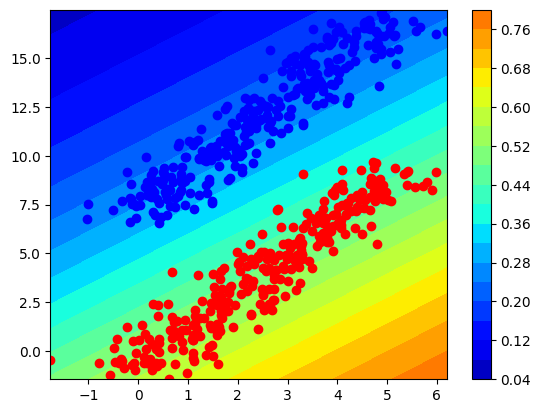

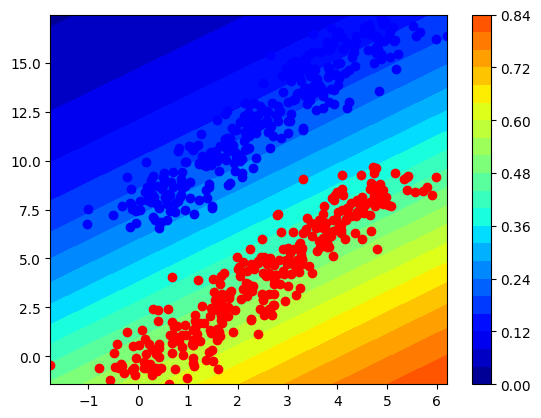

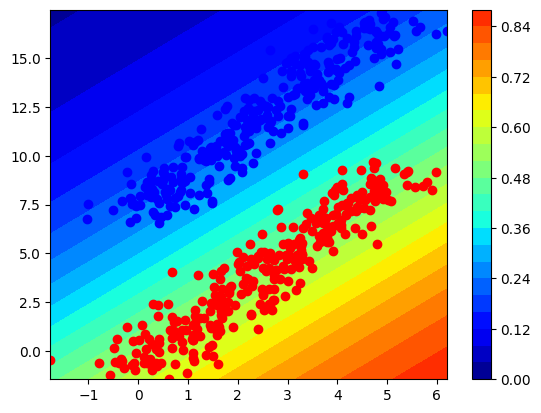

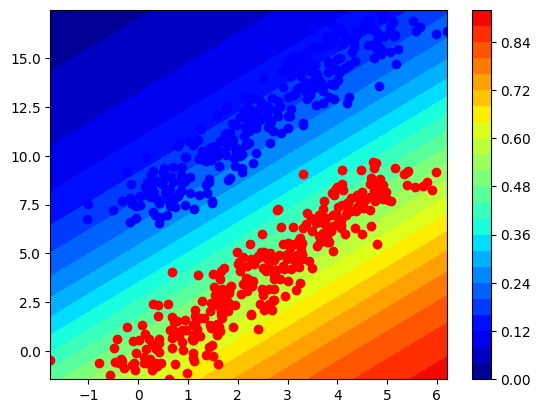

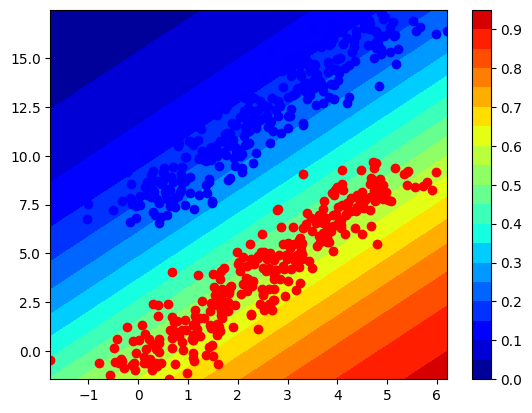

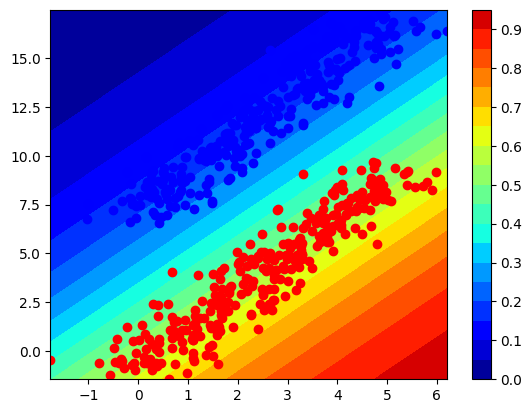

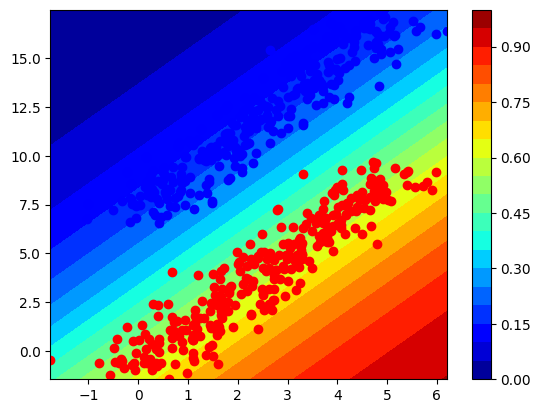

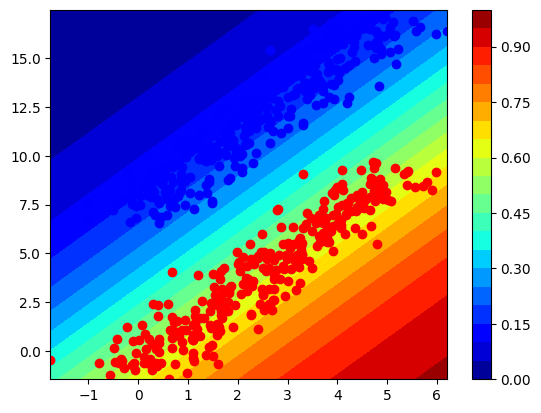

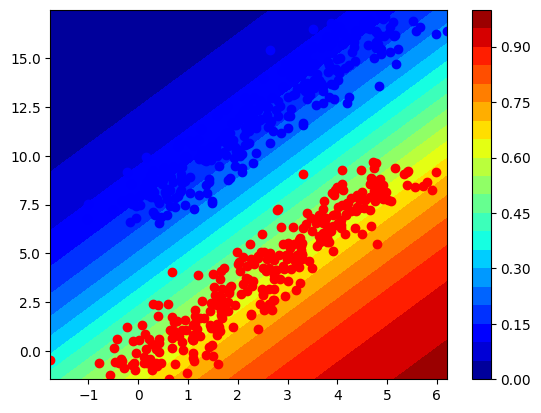

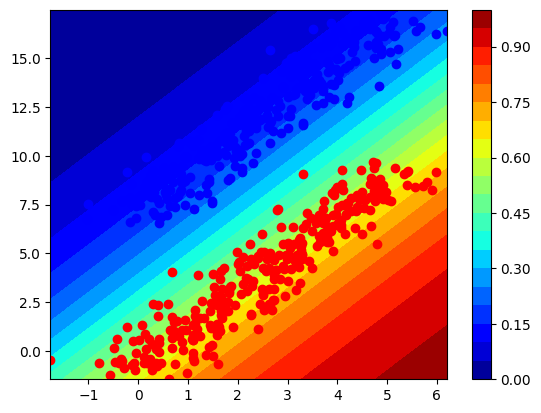

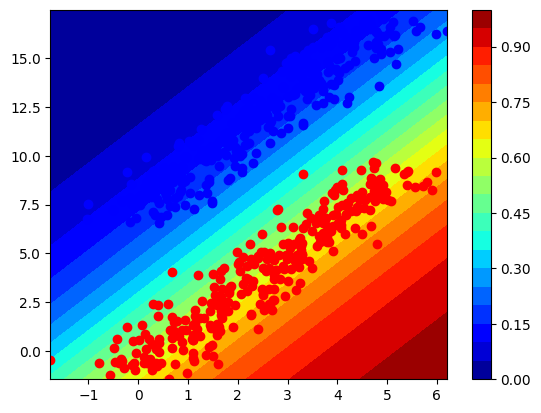

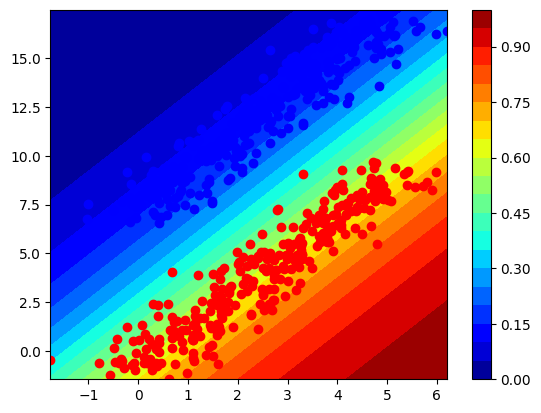

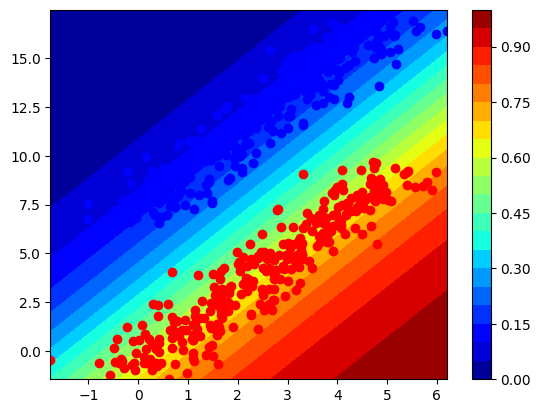

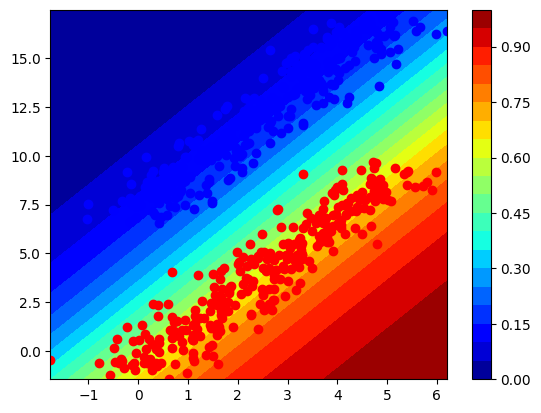

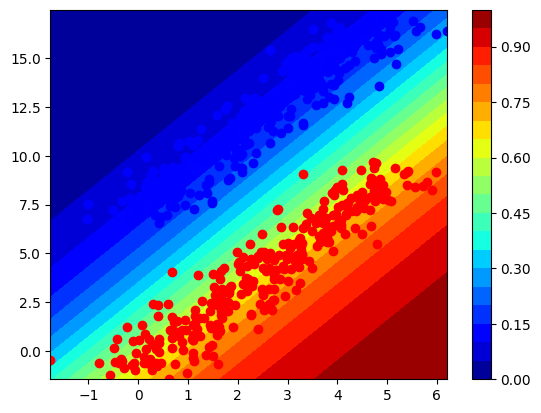

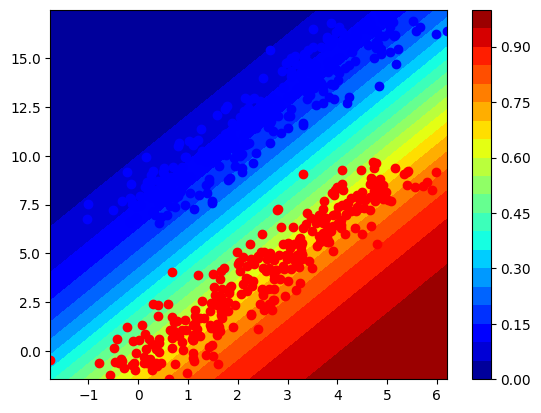

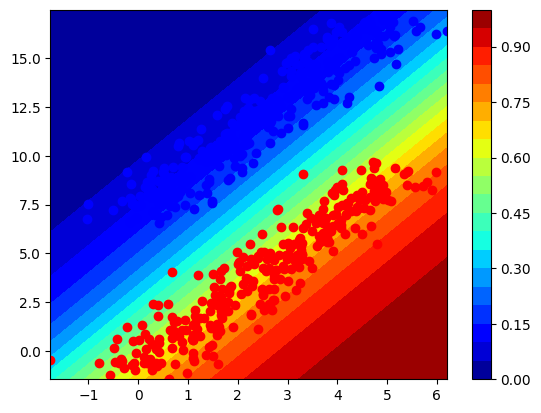

[ 0.26611617  0.68512374 -0.32880834]


In [ ]:
w_est = np.zeros(3)
learning_rate = 0.1

for _ in range(20):
  y_hat =   #TODO
  diff =   #TODO
  grad =   #TODO
  w_est = w_est - learning_rate * grad / n_samples
  plot_regression_state(inputs, w_est)

print(w_est)

A kirajzolásból jól látszik a súlyok iteratív frissítésének hatása. (A küszöb 0.5 körül van, az az alatti értékeknek megfelelő színek a kék osztályhoz tartoznak, az a felettiek a piros osztályhoz.)

# **Neurális hálózatok**

Az előzőekben megismert logisztikus regressziót általánosítva eljuthatunk a neurális hálózatokhoz. A predikció a következő összefüggés alapján történt a logisztikus regresszió során:

$\displaystyle \hat{y} = p(y=1|x) = \sigma(\mathbf{w}^\mathsf{T}\phi(\mathbf{x}))$

A bemeneti $\mathbf{x}$ vektort először transzformáltuk (hozzáadtuk a bias komponenst), majd vettük a komponenseinek a súlyozott összegét és alkalmaztuk rá a szigmoid függvényt.


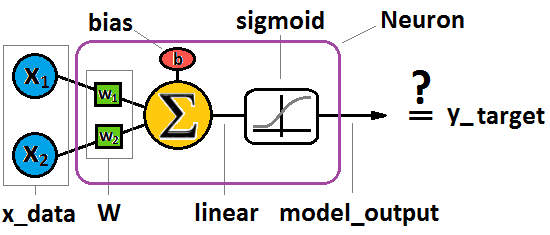

Ezt általánosíthatjuk úgy, hogy megkapjuk a neurális hálózatok építőegységeit, a neuronokat:
- az $\mathbf{x}$ lesz a neuron bemenete
- ehhez mindig hozzárakja a bias komponenst
- ezen módosított bemeneti komponenseknek veszi a súlyozott összegét (itt ezeket a súlyokat kell megtanulnia)
- végül alkalmaz rá valamilyen nemlineáris $f$ függvényt (ez lehet akár szigmoid is), amit **aktivációs függvénynek** hívunk.

Tehát az $\displaystyle \hat{y} = f(\mathbf{w}^\mathsf{T}\phi(\mathbf{x}))$ összefüggés fogja megadni egy neuron kimenetét (ahol a $\phi$ csak egy 1-es értékű komponenst rak a bemenethez a bias miatt). Az $f$ aktivációs függvény megválasztása a megoldandó feladat és a neuron architektúrában való elhelyezkedésének függvénye.

Az elemi neuronokat rétegekbe szervezzük. Minden adott rétegben található neuron az előző réteg kimenetét kapja bemenetül:



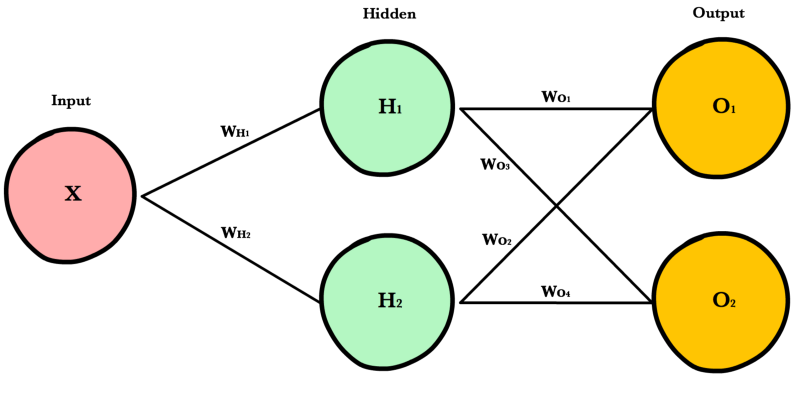

Megkülönböztetünk bemeneti- (első), kimeneti- (utolsó) és rejtett (a kettő közötti) rétegeket. Az ábrán egy rejtett réteg van, de ebből lehet (sokkal) több is (hagyományosan 3 felett már mély neurális hálózatnak tekinthetők, de a modern mély neurális hálózatok akár több 100 réteggel rendelkezhetnek).

Egy adott rétegeben lévő neuronok aktivációs függvénye megegyezik. Az aktivációs függvény többféle lehet. Alább felsoroltunk néhány jellemző típust:

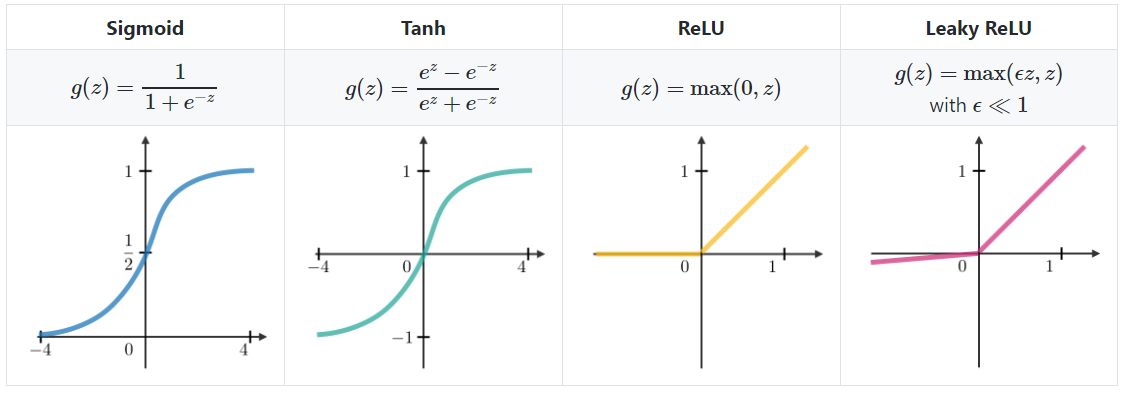

Osztályozási problémánál például jellemzően a kimeneti rétegben szigmoidot használunk (vagy az itt nem felsorolt softmaxot), a többi rétegben pedig ReLU-t.

Regressziós probléma esetén az utolsó rétegről jellemzően elhagyjuk az aktivációs függvényt (lineáris aktiváció).

Az alábbi táblázat egy jó ökölszabályt mutat arra, hogy a feladat függvényében hogyan érdemes beállítani a neurális hálózat bizonyos tulajdonságait.

| **Feladat típusa**                   | **Neuronok száma az utolsó rétegben** | **Aktiváció a rejtett réteg(ek)ben** | **Aktiváció a kimeneti rétegben** | **Hibafüggvény**            |
|--------------------------------------|---------------------------------------|--------------------------------------|-----------------------------------|-----------------------------|
| bináris osztályzás                   | 1                                     | ReLU                                 | szigmoid                          | bináris keresztentrópia     |
| többosztályos, egycímkés osztályzás  | osztályok számával egyenlő            | ReLU                                 | softmax                           | kategorikus keresztentrópia |
| többosztályos, többcímkés osztályzás | osztályok számával egyenlő            | ReLU                                 | szigmoid (minden osztályra külön) | bináris keresztentrópia     |
| regresszió tetszőleges értékre       | 1                                     | ReLU                                 | -                                 | MSE                         |
| regresszió 0 és 1 közötti értékre    | 1                                     | ReLU                                 | szigmoid                          | MSE/bináris keresztentrópia |

A neurális hálózatok kimenetét tehát úgy kapjuk meg, hogy sorra kiértékeljük a rétegeket (az azokban található neuronokat). Ez a forward propagation. További részletekért [itt](https://ml-cheatsheet.readthedocs.io/en/latest/forwardpropagation.html#simple-network) érdemes tovább olvasni.

A neurális hálózatok tanítása gradiens módszerrel (gradient descent) történik,  hasonlóan a logisztikus regresszióhoz. Itt hibavisszaterjesztésnek (backpropagation) szokták nevezni. A tanítás (bemenet; elvárt kimenet) párokkal történik. A bemenet alapján kiszámoljuk az elvárt kimenetet (forward propagation). Ezután egy előzőleg definiált hibafüggvény (loss function/cost function) segítségével ki tudjuk számolni a kapott és az elvárt kimenet közti hibát. A tanulási folyamat pedig abból áll, hogy minden egyes neuron súlya szerint kiszámoljuk a hibafüggvény gradiensét és ezen gradiensvektorral módosítjuk a súlyvektorokat. Így próbáljuk minimalizálni a hibafüggvény értékét. Ennél részletesebb leírás [itt](https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html) található (ezt kötelezően ajánlott elolvasni). A leírásban a hibafüggvényt $C$ jelöli (cost function).

Idáig lineáris regresszióval és lineárisan szeparálható osztályozási problémákkal foglalkoztunk. Ezeket a feladatokat egyetlen neuronnal is meg lehet oldani, ahogyan azt az előző feladatban láttuk.
Azonban nem minden osztályozási feladat lineárisan szeparálható. Két dimenzióban ez azt jelenti, hogy nem mindig elegendő egy egyenes az adatpontjaink kettéválasztásához (több dimenzióban pedig ugyanez igaz hipersíkkal). Ilyen esetekben komplexebb modellekre van szükség, melyek megfelelő görbéket tudnak illeszteni az adatpontjaink köré. A következő feladatokban olyan problémával is fogunk találkozni, melyről ránézésre is látszik, hogy nem megoldható a korábbi modell alkalmazásával.

-----------------------------

#**Tensorflow**#
A TensorFlow egy nyílt forráskódú könyvtár gépi tanuláshoz, melyet modellek építéséhez, tanításához és kiértékeléséhez fogunk használni. Erőssége, hogy:
- kihasználja, hogy a neurális hálózatok számításai párhuzamosíthatóak, amivel jelentős gyorsítást lehet elérni, főleg ha GPU-n futtatjuk a számításokat
- a neurális hálózat létrehozásakor felépít egy számítási gráfot, ami alapján automatikusan kiszámítja a gradienst, tehát nem nekünk kell azt kiszámolni (még akkor sem, ha saját magunk írunk valamilyen számítást - feltéve, hogy tf függvényeket használtunk)

In [ ]:
%reset -sf

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# TF verzió ellenőrzése
print(tf.__version__)

2.14.0


## Korábbi bináris szeparációs feladat TensorFlow alapú implementációja##

Az első feladatban egy, a bevezetőben bemutatotthoz hasonló lineárisan szeparálható bináris osztályozási feladattal találkozunk.
Az adathalmaz előállítása és ábrázolása után egy neuron betanításával fogjuk megoldani a problémát.
A feladat során figyelje meg a tanító algoritmus viselkedését a konvergencia sebessége és a pontosság szempontjából!

Futtassa az alábbi kódrészletet, hogy a későbbiekben lehetőség legyen egyszerűen ábrázolni a 2D adatokon a modellek predikcióit.

In [ ]:
def plot_grid_of_model(model, inputs, labels):
  # Döntési felület ábrázolásához grid létrehozása
  # Tengelyek menti kiterjedés
  x_min = inputs[:, 0].min() - 0.2;
  x_max = inputs[:, 0].max() + 0.2;
  y_min = inputs[:, 1].min() - 0.2;
  y_max = inputs[:, 1].max() + 0.2;

  h = (x_max - x_min)/50.0  # grid pontjainak távolsága
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  grid_points = np.c_[xx.ravel(), yy.ravel()]

  # Grid celláinak osztalyozasa a paraméterben átadott modell segítségével
  grid_predictions = model.predict(grid_points)
  grid_predictions_drawing = grid_predictions.reshape(xx.shape)

  # Ábra inicializálása
  # fig1, ax2 = plt.subplots(constrained_layout=True)
  fig1, ax2 = plt.subplots()

  # Tanítóminták kirajzolása
  for i in range(len(labels)):
      if(labels[i] == 1.0):
          ax2.plot(inputs[i,0], inputs[i,1], 'ro')
      else:
          ax2.plot(inputs[i,0], inputs[i,1], 'bo')

  # A grid celláinak kirajzolása a fenti korábbi osztályozás alapján
  CS = ax2.contourf(xx, yy, grid_predictions_drawing,
                11,  cmap='jet',
                alpha=0.5, vmin=0, vmax=1)

  # A szeparáló görbe berajzolása
  CS2 = ax2.contour(CS, levels=[0.5], colors='g')
  cbar = fig1.colorbar(CS)
  cbar.add_lines(CS2)

##Tanító, validációs és teszt adathalmazra bontás##

A kialakított neurális háló modell teljesítményét többféleképpen mérhetjük. Az egyik lényeges elvárásunk a modellel szemben, hogy ne csak azokon a bemeneti mintákon "működjön jól", melyeken a tanítottuk, hanem olyanok esetében is, melyekkel nem találkozott a tanítás folyamán. Ezt a tulajdonságot nevezzük **általánosító képesség**nek. Azt a jelenséget pedig, amikor a modell kizárólag a tanító mintákon nyújt megfelelő teljesítményt, **túltanulás**nak nevezzük. Az általánosító képesség megtartására több módszert alkalmazhatunk. Az egyik alapvető megközelítés szerint a rendelkezésre álló mintáinkat, vagyis az azokat tartalmazó adathalmazt 3 részre osztjuk: (1) **tanító adathalmaz**ra, (2) **validációs adathalmaz**ra és (3) **teszt adathalmaz**ra. A tanító adathalmaz mintáit használjuk fel bementeként a modell tanítása folyamán. A validációs adathalmaz egy mérője annak, hogy hogyan teljesít a modell olyan adathalmazon, amin nem tanítottuk. A tanítás iterációi folyamán kiértékeljük a modellt a validációs adathalmazon is (a tanító adathalmaz mellett), és amikor elkezd romlani a teljesítmény a validációs adathalmazon, akkor a tanítást leállítjuk. Végül a teszt adathalmazt a tanítás folyamatától teljesen független adathalmazként használjuk fel a modell kiértékelésére, általánosító képességének megítélésére.

Számos további lehetőség van az általánosító képesség biztosítására, például oly módon, hogy a neurális háló paramétereire vagy struktúrájára teszünk megkötéseket. Ez utóbbiak közül egy egyszerű módszer a **dropout** alkalmazása, ami annyit jelent, hogy a tanítás során adott valószínűséggel kihagyunk adott neuronokat, mintha nem lennének jelen a hálóban. Ezáltal arra ösztönözzük a neurális hálót, hogy azokat az elemeket próbálja megtanulni, amelyek a legfontosabbak.


## Tanítóhalmaz létrehozása

Másolja be az [előző feladatból](#scrollTo=_51VjDps-S4K&line=7&uniqifier=1) az adathalmaz generálásának kódját!

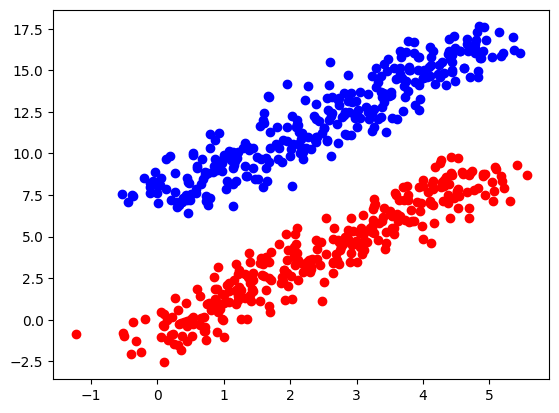

In [ ]:
###############TODO!#################

# --- Bemeneti minták generálása ---

# "0" címkéjű (kék) osztály mintái: 0<x1<5; x2=2⋅x1+7

# "1" címkéjű (piros) osztály mintái: 0<x1<5; x2=2⋅x1−1

# bemeneti adatok egymás után fűzése

# zaj hozzáadása


# --- Címkék generálása ---

# címkék egymás után fűzése

# kirajzolás


###**Ellenőrző kérdések**###
A bemeneti mátrix `shape` attribútumával kérdezzük le annak méretét.

In [ ]:
  # TODO

(600, 2)


Miért ekkora a mátrix mérete (miért akkora az 1., és miért akkora a 2. dimenzió mentén a méret)?
```
# TODO:
```


Milyen értékeket tartalmaz a címkézés (`labels`)?

```
# TODO:
```

In [ ]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Mekkora a címkéket tartalmazó vektor mérete? Írassuk ki!

In [ ]:
  # TODO

(600,)


## Neuron létrehozása

Most, hogy az adathalmaz készen áll, folytassuk a neuron létrehozásával. Ezt ebben a feladatban egy egyrétegű neurális hálóval fogjuk megvalósítani, melynek egyetlen rétege egyetlen neuront tartalmaz.

A `tf.keras.Sequential` API-val könnyen tudunk egyszerű neurális hálókat létrehozni a következőképpen:

```
# szekvenciális háló létrehozása
model = tf.keras.Sequential()

# 1 db, 4 neuront tartalmazó teljesen összekötött réteg hozzáadása, szigmoid aktivációval:
model.add(tf.keras.layers.Dense(4, activation="sigmoid"))

# a modell véglegesítése a bemeneti batch méret megadásával
# itt a None jelöli azt a dimenziót, ahol az egyes mintákat felsoroljuk, 2 pedig egy minta mérete
# a feladatban is ugyanekkora mérettel fogunk dolgozni
model.build((None, 2))

# a modell fordítása
model.compile(...)
```

**Feladat:**
- A [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) osztály segítségével hozzon létre egy neurális hálót!
- A hálónak egy [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) rétege legyen, mely pontosan 1 neuront tartalmaz!
- Alkalmazzon [Szigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) aktivációs függvényt!





In [ ]:
# -- TODO --
model =
model.add()
model.build()
# -- TODO --

# fordítás
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# összefoglaló a modellről
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Ha minden igaz, a modell összefoglalásának kiíratása után látjuk, hogy három tanítható paramétere lett a hálónak. Ezek a korábban használt jelölés szerint a w_1, w_2 és b paraméterek.

<center><img src="https://i.ibb.co/8g5kd39/09-pic.png" width="350"></center>

Mint azt már korábban láttuk, ezek a paraméterek szoros összefüggésben állnak a szeparáló egyenessel. Mi ez az összefüggés?

**Feladat:**
- Próbáljon meg (iteratív próbálgatással, vagy számolással) olyan $w_1$, $w_2$, $b$ paramétereket találni, amelyek mellett a háló (maximum 1-2 pontot leszámítva) helyesen osztályozza az adathalmaz pontjait!

225/225 [==============================] - 1s 1ms/step


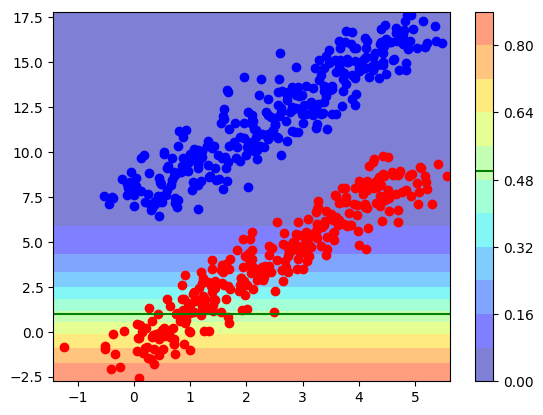

In [ ]:
w_1 = 0.0  # TODO
w_2 = -0.5  # TODO
b = 0.5  # TODO

model.layers[0].set_weights((np.array([[w_1], [w_2]]), np.array([b])))

plot_grid_of_model(model, inputs, labels)
plt.show()

Ha sikerült megfelelő paramétereket találni, nézzük meg, hogyan lehet ezt hasonló kezdeti konfigurációból ($w_1=0.0, w_2=-0.5, b=0.5$) iteratív tanító algoritmussal elérni!

**Feladat:**
- Nézzen utána a [Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model) osztály [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) metódusának! Ezzel a metódussal tudjuk a neurális hálózatot bemenet-kimenet párokkal tanítani. Most csak az első 2 paraméterét fogjuk használni, melyek rendre a bemenetet és a címkézést tartalmazó mátrixok lesznek.
- Egészítse ki az alábbi kódrészletet a tanító lépéssel és figyelje meg az ábrák segítségével a tanítás folyamatát!
- Ha szükségesnek érzi, vegye nagyobbra (vagy kisebbre) a _num_epochs_ váltózó értékét! Ez az érték állítja azt, hogy a neurális hálózat a tanulás során hányszor lássa az adatmintákat. Várhatóan, ha többször látja, akkor jobban fog teljesíteni.

225/225 [==============================] - 0s 1ms/step


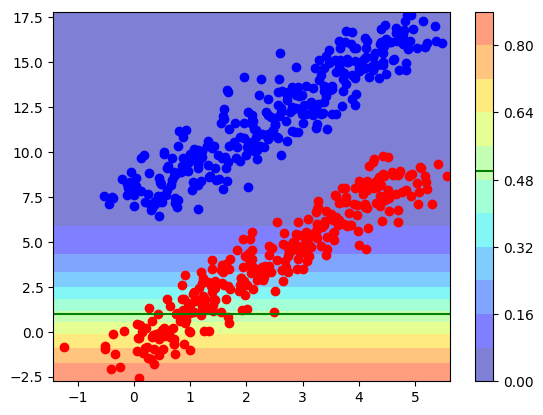

225/225 [==============================] - 0s 1ms/step


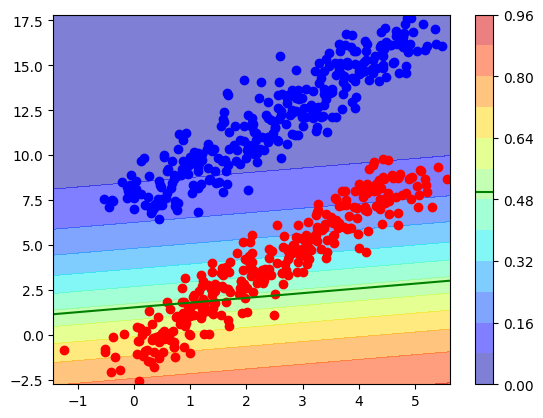

225/225 [==============================] - 0s 1ms/step


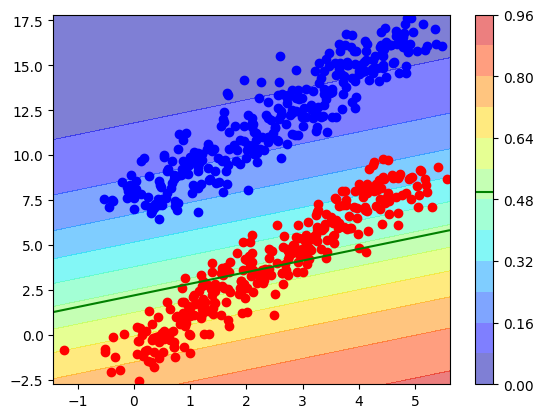

225/225 [==============================] - 0s 1ms/step


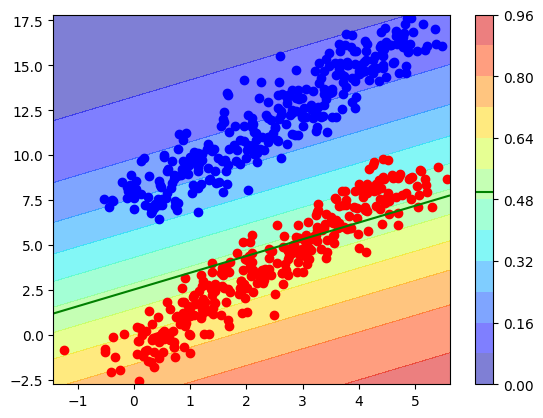

225/225 [==============================] - 0s 2ms/step


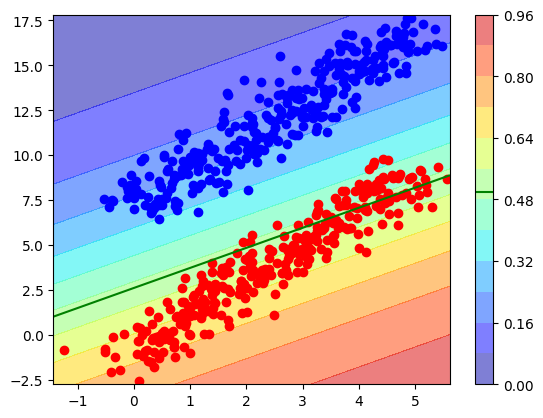

225/225 [==============================] - 1s 2ms/step


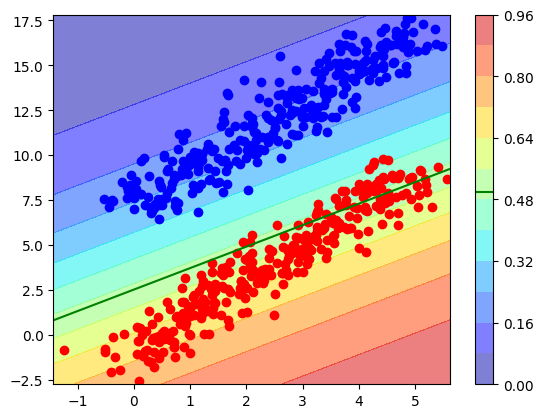

225/225 [==============================] - 0s 1ms/step


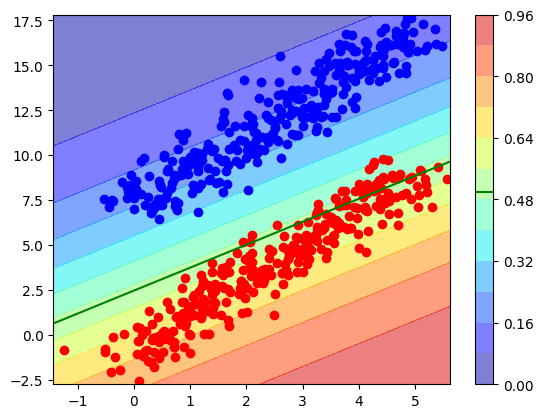

225/225 [==============================] - 0s 1ms/step


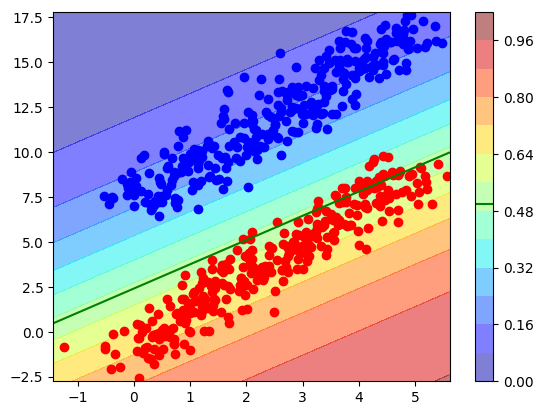

225/225 [==============================] - 0s 2ms/step


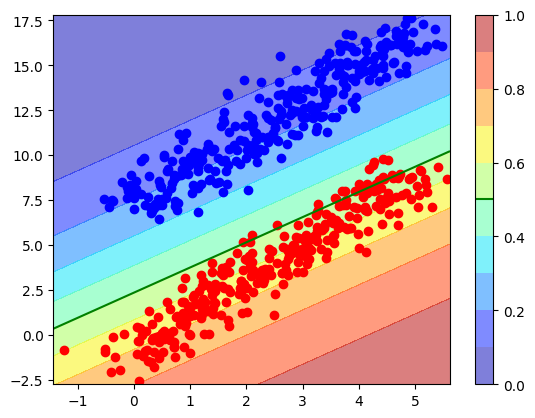

225/225 [==============================] - 0s 1ms/step


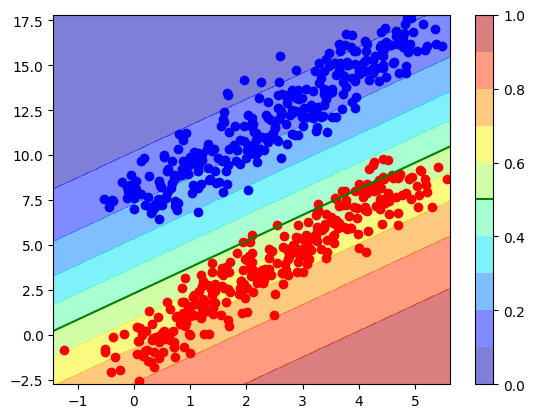

225/225 [==============================] - 0s 2ms/step


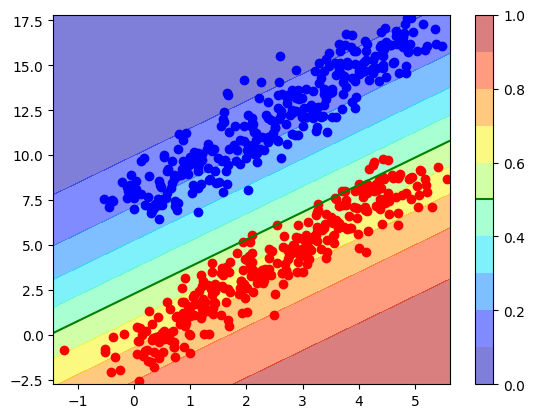

In [ ]:
model.layers[0].set_weights((np.array([[0.0], [-0.5]]), np.array([0.5])))

plot_grid_of_model(model, inputs, labels)
plt.show()

"""
num_epochs: Az a szám, hogy hányszor engedjük a tanítás során végig nézni az algoritmusnak a teljes adathalmazt.
Ebben a feladatban egyelőre ne használjuk fit() hasonló nevű paraméterét!
"""
num_epochs = 10
for i in range(num_epochs):
  model.fit(x=inputs, y=labels)
  plot_grid_of_model(model, inputs, labels)
  plt.show()

Ha elégedettek vagyunk az eredménnyel, nézzük meg az optimalizáció után kapott paramétereket. Van összefüggés ezek és az általunk kézzel beállított paraméterek között?

In [ ]:
(w_1, w_2), b = model.layers[0].get_weights()
print(f'w_1 = {w_1.item():.2f}')
print(f'w_2 = {w_2.item():.2f}')
print(f'b = {b.item():.2f}')

w_1 = 0.43
w_2 = -0.29
b = 0.65


 # **Osztályozás neurális hálóval**

## Tanítóhalmaz létrehozása

Kezdjük a feladatot ismét az adathalmaz létrehozásával!

Adathalmazunk most a következő ábrához hasonlóan fog kinézni:

<center><img src="https://i.ibb.co/jwBPwKp/11-pic.png" width="350"></center>

A címkéket úgy adjuk meg, hogy a kék pontok a 0-ás címkéjűek, a pirosak pedig 1-esek.

**Feladat:**
- Adja meg a piros (1-es osztályú) pontok címkéit!

(250, 1)


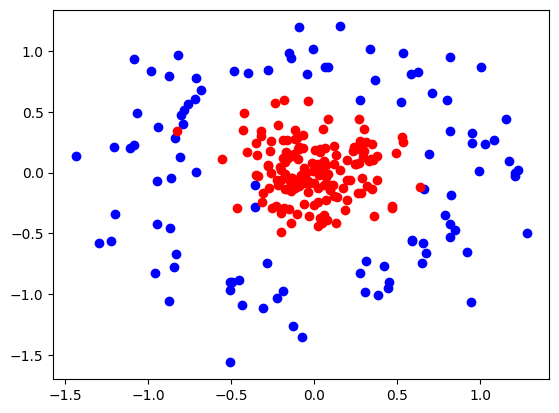

In [ ]:
# paraméterek
num_samples = 5*50
variance = 0.22

# minták
x = np.linspace(0, 6.26, 2*num_samples//5)
class_0_x1 = np.cos(x)
class_0_x2 = np.sin(x)
class_0 = np.column_stack((class_0_x1, class_0_x2))

class_1 = np.repeat([0.0, 0.0], 3*num_samples//5).reshape(-1, 2)


inputs = np.row_stack((class_0, class_1))

# minták pertubációja normál i.i.d zajjal
noise = np.random.normal([0.0, 0.0], variance, [num_samples, 2])
inputs = inputs + noise

# osztályok címkéi
label_0 = np.repeat(0.0, 2*num_samples//5)  # a minták 2/5-e legyen 0-ás (kék)
label_1 = np.repeat()  # a minták 3/5-e legyen 1-es (piros) #TODO

labels = np.concatenate((label_0, label_1))
labels = np.expand_dims(labels, 1)
print(labels.shape)

# tanítóminták megjelenítése
for i in range(num_samples):
  marker = 'bo' if labels[i] == 0.0 else 'ro'
  plt.plot(inputs[i,0], inputs[i,1], marker)
plt.show()

## Modell létrehozása és tanítás

Először próbáljuk meg megoldani a feladatot az előző feladatban látott hálóval!

**Feladat:**
- Hozzon létre egy az előzőhöz hasonló modellt (1 réteg, 1 neuron, szigmoid aktiváció)
- A korábbihoz hasonlóan egészítse ki a tanító ciklust a tanító lépéssel, majd futtassa a cellát!
- Most már nem vagyunk kíváncsiak az ábrára az összes lépés után. Vegye magasabbra a _fit()_ függvény _epochs_ paraméterét!
- Mit tapasztal? Mit gondol, miért történik ez?


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
80/80 [==============================] - 0s 2ms/step


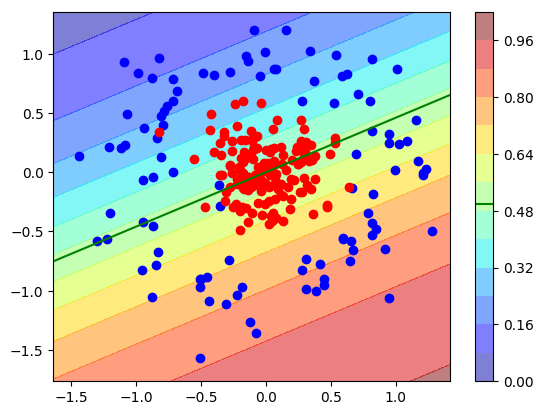

80/80 [==============================] - 0s 2ms/step


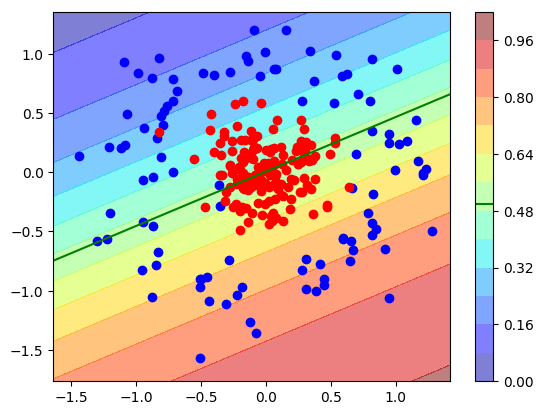

80/80 [==============================] - 0s 2ms/step


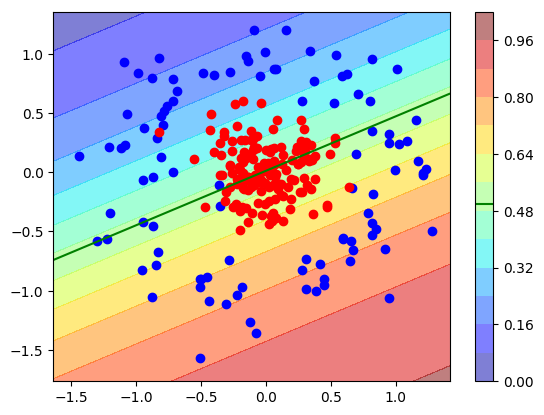

80/80 [==============================] - 0s 2ms/step


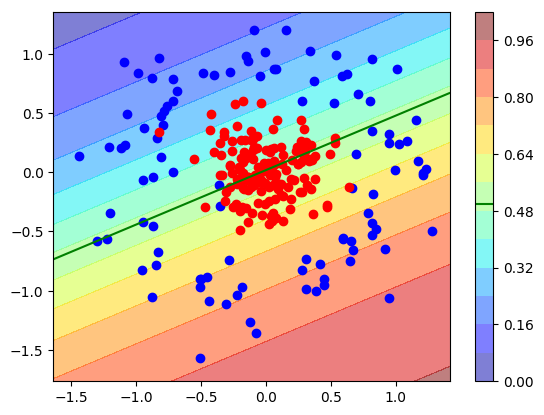

80/80 [==============================] - 0s 2ms/step


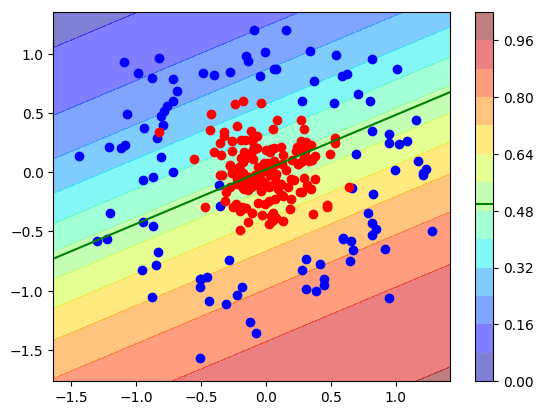

80/80 [==============================] - 0s 1ms/step


80/80 [==============================] - 0s 2ms/step


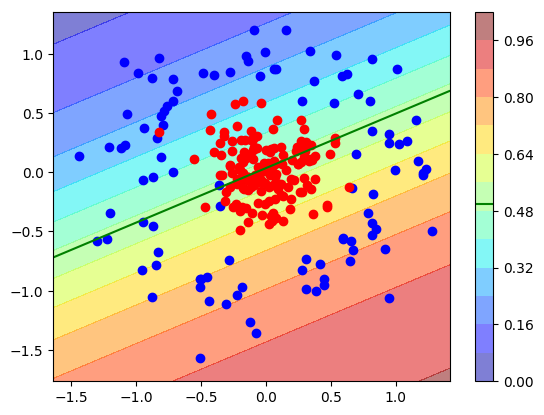

80/80 [==============================] - 0s 1ms/step


80/80 [==============================] - 0s 1ms/step


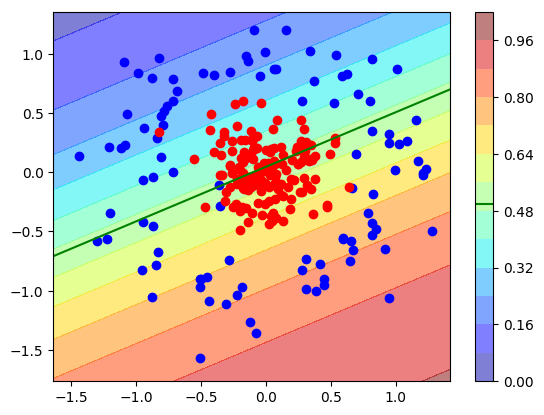

80/80 [==============================] - 0s 1ms/step


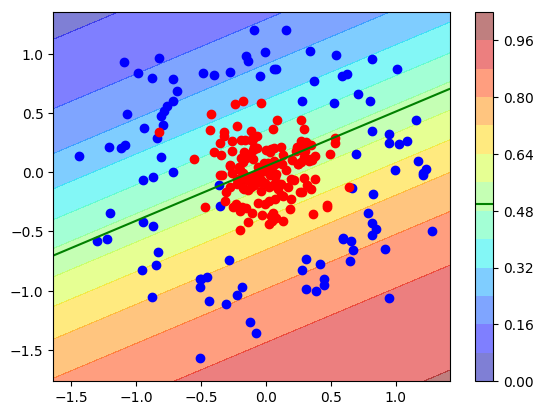

80/80 [==============================] - 0s 2ms/step


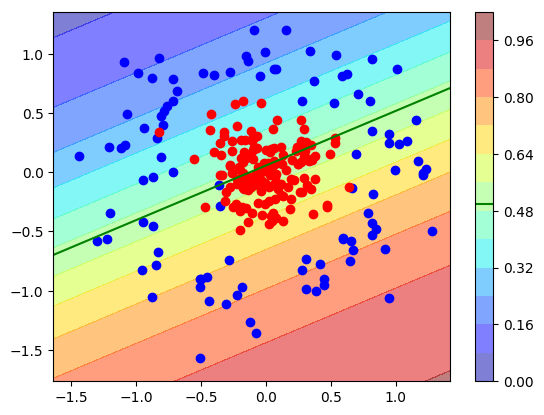

In [ ]:
# -- TODO --
model_2 =
model_2.add()
model_2.build()
# -- TODO --

model_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_2.summary()


plot_grid_of_model(model_2, inputs, labels)
plt.show()
for i in range(10):
  model_2.fit(x=inputs, y=labels)
  plot_grid_of_model(model_2, inputs, labels)
  plt.show()

Ezután próbáljuk meg megoldani a feladatot egyetlen neuron helyett egy összetettebb hálóval!

**Feladat:**
- a) Hozzon létre két Dense rétegből álló neurális hálót!
 - Az új réteg legyen az 1 neuronból álló `sigmoid` aktivációt alkalmazó réteg **előtt**,
 - tartalmazzon 2 neuront, és alkalmazzon `relu` aktivációt!
 - dokumentálja a következő cellában, hogy mit tapasztal!
- b)
 - cserélje az első Dense rétegben a neuronok számát 3-ra!
 - dokumentálja a következő cellában, hogy mit tapasztal!
- c)
 - cserélje az első Dense rétegben a neuronok számát 10-re!
 - dokumentálja a következő cellában, hogy mit tapasztal!

- d) Hozzon létre három Dense rétegből álló neurális hálót!
 - Az új réteg legyen az 1 neuronból álló `sigmoid` aktivációt alkalmazó réteg előtt,
 - a két rejtett réteg tartalmazzon 2-2 neuront, és alkalmazzon `relu` aktivációt!
 - dokumentálja a következő cellában, hogy mit tapasztal!
- e)
 - cserélje a két rejtett rétegben a neuronok számát 5-re!
 - dokumentálja a következő cellában, hogy mit tapasztal!


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
80/80 [==============================] - 0s 2ms/step


Epoch 1/10
8/8 [==============================] - 1s 5ms/step - loss: 0.6834 - accuracy: 0.5600
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.6760
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.7160
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.7040
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.6960
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6616 - accuracy: 0.6920
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6579 - accuracy: 0.6760
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.6840
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6800
Epoch 10/10
80/80 [==============================] - 0s 3ms/step


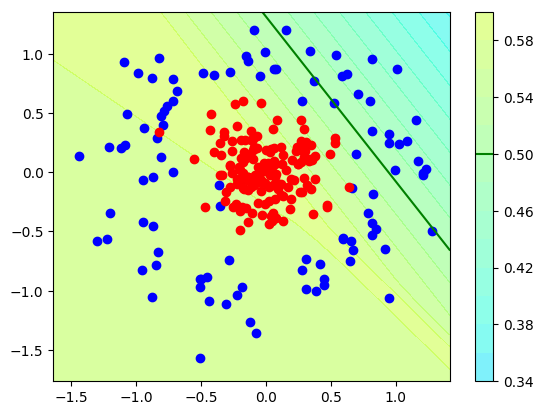

Epoch 1/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6469 - accuracy: 0.6840
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6447 - accuracy: 0.6800
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6423 - accuracy: 0.6880
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.6880
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6920
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6360 - accuracy: 0.6920
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6343 - accuracy: 0.6920
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6320 - accuracy: 0.6920
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6299 - accuracy: 0.6920
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


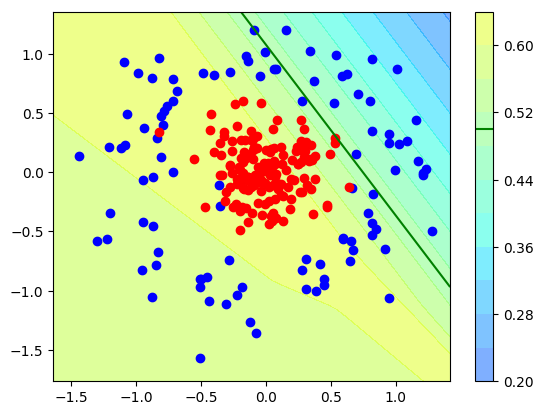

Epoch 1/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6258 - accuracy: 0.6960
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6240 - accuracy: 0.6920
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.6920
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6197 - accuracy: 0.7040
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.7000
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.7080
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6134 - accuracy: 0.7080
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.7120
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6092 - accuracy: 0.7120
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


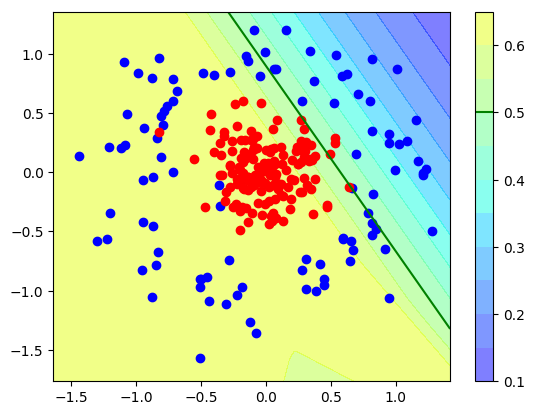

Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6052 - accuracy: 0.7120
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.7120
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6009 - accuracy: 0.7120
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.7120
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5964 - accuracy: 0.7240
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.7200
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.5923 - accuracy: 0.7200
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.5901 - accuracy: 0.7240
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5879 - accuracy: 0.7200
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


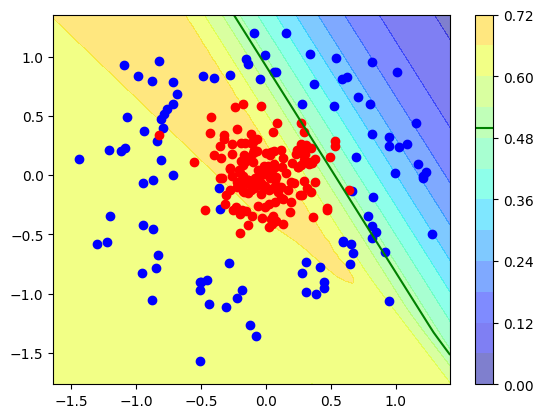

Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.7240
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5812 - accuracy: 0.7200
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.7240
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.7240
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7200
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.7200
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.7240
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7240
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.7200
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7240
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5496 - accuracy: 0.7200
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7200
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7280
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.7320
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7280
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7440
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7640
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.7720
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


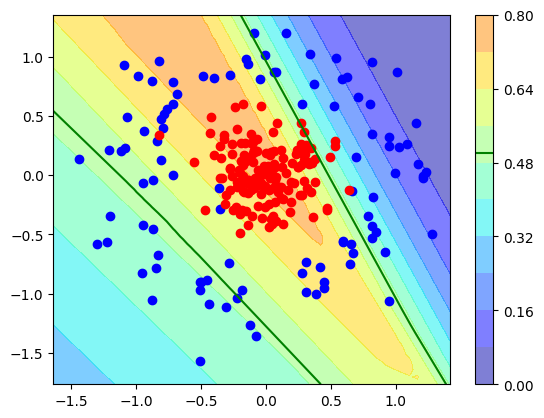

Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.8040
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.8040
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4949 - accuracy: 0.8160
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.8200
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.8200
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4782 - accuracy: 0.8240
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.8240
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.8240
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.8240
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


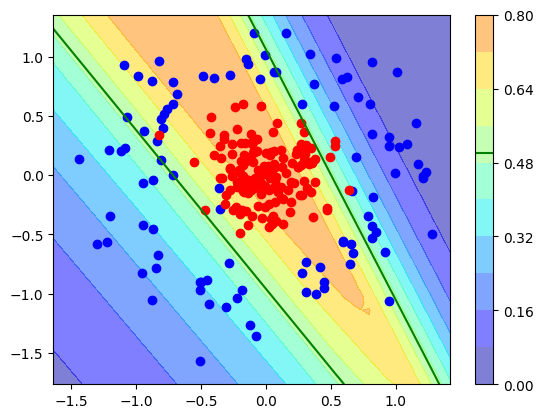

Epoch 1/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4511 - accuracy: 0.8320
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4456 - accuracy: 0.8320
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4414 - accuracy: 0.8280
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4358 - accuracy: 0.8360
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4311 - accuracy: 0.8360
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4286 - accuracy: 0.8360
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4241 - accuracy: 0.8320
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4182 - accuracy: 0.8360
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8320
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


Epoch 1/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8320
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4032 - accuracy: 0.8320
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4005 - accuracy: 0.8320
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3975 - accuracy: 0.8360
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8400
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8440
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8480
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3863 - accuracy: 0.8480
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3844 - accuracy: 0.8480
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


Epoch 1/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3792 - accuracy: 0.8520
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3771 - accuracy: 0.8520
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8520
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 0.3733 - accuracy: 0.8520
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3716 - accuracy: 0.8560
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3700 - accuracy: 0.8520
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3674 - accuracy: 0.8520
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3667 - accuracy: 0.8520
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3642 - accuracy: 0.8560
Epoch 10/10
80/80 [==============================] - 0s 3ms/step


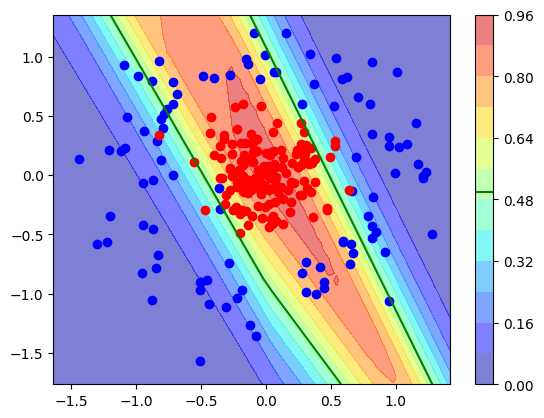

Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8520
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.8520
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3586 - accuracy: 0.8520
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3570 - accuracy: 0.8560
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3546 - accuracy: 0.8560
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8600
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3532 - accuracy: 0.8560
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8600
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.8600
Epoch 10/10
80/80 [==============================] - 0s 3ms/step


Epoch 1/10
8/8 [==============================] - 0s 7ms/step - loss: 0.3461 - accuracy: 0.8560
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3438 - accuracy: 0.8640
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3423 - accuracy: 0.8600
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3399 - accuracy: 0.8600
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3392 - accuracy: 0.8600
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3362 - accuracy: 0.8600
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3344 - accuracy: 0.8600
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3311 - accuracy: 0.8600
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8640
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


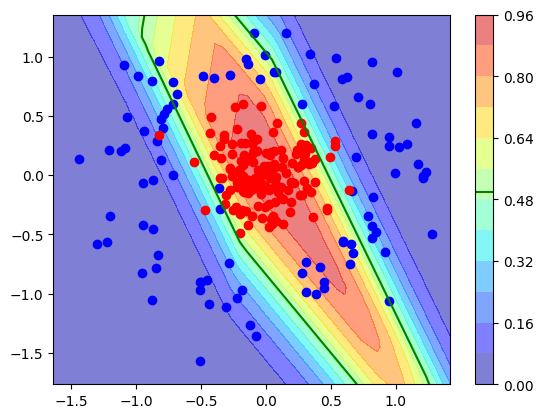

Epoch 1/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3245 - accuracy: 0.8600
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0.8760
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3182 - accuracy: 0.8720
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3159 - accuracy: 0.8720
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3127 - accuracy: 0.8760
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3069 - accuracy: 0.8760
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3025 - accuracy: 0.8840
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2990 - accuracy: 0.8800
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2968 - accuracy: 0.8880
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


Epoch 1/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2871 - accuracy: 0.8920
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2825 - accuracy: 0.8960
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.8960
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2727 - accuracy: 0.8920
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2665 - accuracy: 0.8920
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.2623 - accuracy: 0.8880
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2565 - accuracy: 0.8960
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.8920
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.8920
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


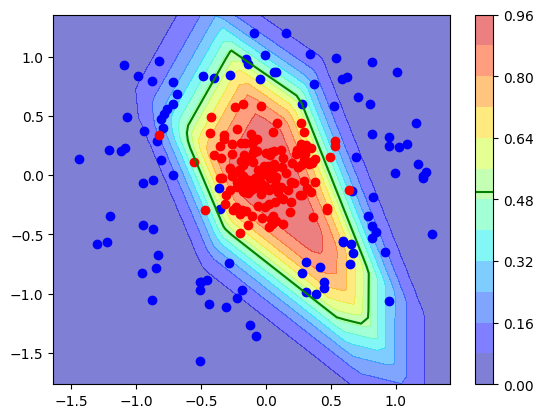

Epoch 1/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2339 - accuracy: 0.9000
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2308 - accuracy: 0.9080
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2243 - accuracy: 0.9120
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9080
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2148 - accuracy: 0.9120
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2098 - accuracy: 0.9160
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2053 - accuracy: 0.9160
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2004 - accuracy: 0.9200
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1950 - accuracy: 0.9240
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


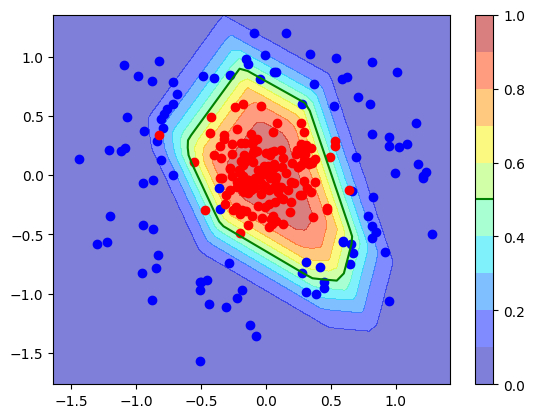

Epoch 1/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9400
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.9400
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1751 - accuracy: 0.9480
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1713 - accuracy: 0.9440
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1667 - accuracy: 0.9440
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 0.9400
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.9440
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1555 - accuracy: 0.9520
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1530 - accuracy: 0.9520
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


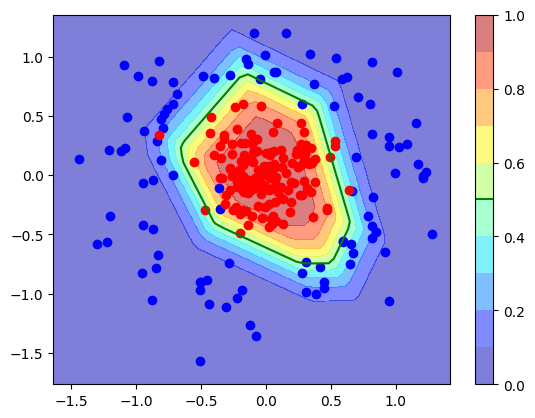

Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1461 - accuracy: 0.9640
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1436 - accuracy: 0.9640
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1408 - accuracy: 0.9680
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 0.9680
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1351 - accuracy: 0.9680
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1327 - accuracy: 0.9680
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.9680
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1301 - accuracy: 0.9720
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1269 - accuracy: 0.9680
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1235 - accuracy: 0.9680
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.9720
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1207 - accuracy: 0.9720
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1187 - accuracy: 0.9720
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9720
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.9720
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1137 - accuracy: 0.9720
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1127 - accuracy: 0.9720
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1122 - accuracy: 0.9720
Epoch 10/10
80/80 [==============================] - 0s 2ms/step


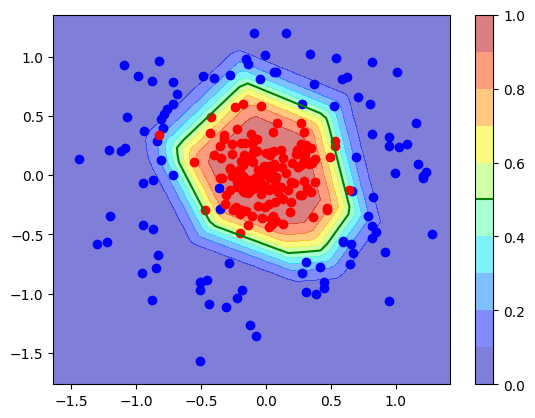

Epoch 1/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1098 - accuracy: 0.9720
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1085 - accuracy: 0.9760
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1067 - accuracy: 0.9800
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1058 - accuracy: 0.9800
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.1060 - accuracy: 0.9800
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1035 - accuracy: 0.9760
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.1029 - accuracy: 0.9840
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1018 - accuracy: 0.9800
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9800
Epoch 10/10
80/80 [==============================] - 0s 3ms/step


Epoch 1/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0993 - accuracy: 0.9840
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0984 - accuracy: 0.9880
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0977 - accuracy: 0.9840
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0964 - accuracy: 0.9840
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0963 - accuracy: 0.9840
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0959 - accuracy: 0.9840
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0946 - accuracy: 0.9840
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9840
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0934 - accuracy: 0.9840
Epoch 10/10
80/80 [==============================] - 0s 3ms/step


In [ ]:
# -- TODO --
model_3 =
model_3.add()
model_3.build()
# -- TODO --

model_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.summary()


plot_grid_of_model(model_3, inputs, labels)
plt.show()
for i in range(20):
  model_3.fit(x=inputs, y=labels, epochs=10)
  plot_grid_of_model(model_3, inputs, labels)
  plt.show()

## **Ellenőrző kérdések**

Mit lát 1 rejtett réteg esetén, 2 neuront alkalmazva? Mit gondol miért?

```
# TODO:
```
\
Mit lát 1 rejtett réteg esetén, 3 neuront alkalmazva?
```
# TODO:
```
\
Mit lát 1 rejtett réteg esetén, 10 neuront alkalmazva?
```
# TODO:
```
\
Mit lát 2 rejtett réteg esetén, 2-2 neuront alkalmazva?
```
# TODO:
```
\
Mit lát 2 rejtett réteg esetén, 5-5 neuront alkalmazva?
```
# TODO:
```